In [ ]:
# Importing all necessary Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.weightstats import ztest
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [ ]:
# importing  the sales data into data frame

df = pd.read_csv('sales_data.csv')
df.head()

,Channel,Sub_channel,Country,City,Product_Class,Quantity,Price,Sales
0,Hospital,Private,Poland,Lublin,Mood Stabilizers,4,368,1472
1,Pharmacy,Institution,Poland,Elbl?g,Mood Stabilizers,2,368,736
2,Pharmacy,Retail,Poland,?wiecie,Antibiotics,7,591,4137
3,Hospital,Private,Poland,Be?chat�w,Antibiotics,4,591,2364
4,Hospital,Private,Poland,Lublin,Mood Stabilizers,3,311,933


<Axes: >

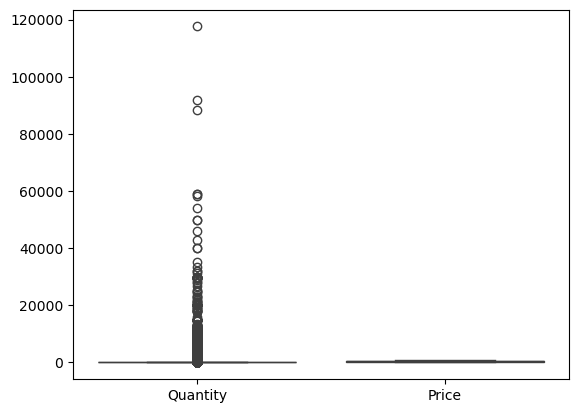

In [ ]:
# Checing for outliers
sns.boxplot(df[['Quantity', 'Price']])

In [ ]:
#removing outliers from quantity column 
df.drop(df[df['Quantity'] > 80000].index, inplace = True)

<Axes: >

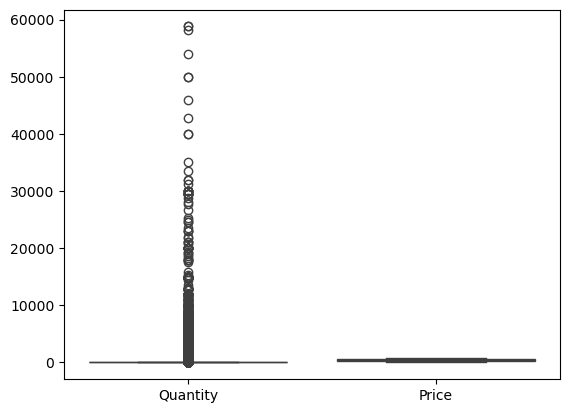

In [ ]:
# Rechecking outliers removal
sns.boxplot(df[['Quantity', 'Price']])

In [ ]:
# Statistical Testing and hypothesis sales by country
# Null Hypothesis: No significant difference between group means
# Alternative Hypothesis: Significant difference between group means
poland = df[df['Country'] == 'Poland']['Sales']
germany = df[df['Country'] == 'Germany']['Sales']

t_stat, p_value = stats.ttest_ind(poland, germany)
print(f"T-Statistic: {t_stat}")
print('\n')
print(f"P-Value: {p_value}")
print('\n')
if p_value < 0.05:
    print("Reject the Null Hypothesis - Significant difference found")
else:
    print("Fail to Reject the Null Hypothesis - No significant difference")


T-Statistic: -19.355805197474286


P-Value: 2.0922430674016695e-83


Reject the Null Hypothesis - Significant difference found


In [ ]:
# Hypothesis Testing Example: t-test for two independent samples

hospital = df[df['Channel'] == 'Hospital']['Sales']
pharmacy = df[df['Channel'] == 'Pharmacy']['Sales']

t_stat, p_value = stats.ttest_ind(hospital, pharmacy)
print(f"T-Statistic: {t_stat}")
print('\n')
print(f"P-Value: {p_value}")
print('\n')
if p_value < 0.05:
    print("Reject the Null Hypothesis - Significant difference found")
else:
    print("Fail to Reject the Null Hypothesis - No significant difference")


T-Statistic: -1.808579032910421


P-Value: 0.07051760997203034


Fail to Reject the Null Hypothesis - No significant difference


In [97]:
df['Sub_channel'].unique()

array(['Private', 'Institution', 'Retail', 'Government'], dtype=object)

In [ ]:
# Hypothesis Testing Example: t-test for two independent samples

private = df[df['Sub_channel'] == 'Private']['Sales']
institution =  df[df['Sub_channel'] == 'Institution']['Sales']
retail =  df[df['Sub_channel'] == 'Retail']['Sales']
government =  df[df['Sub_channel'] == 'Government']['Sales']


t_stat, p_value = stats.f_oneway(private, institution, retail, government)
print(f"T-Statistic: {t_stat}")
print('\n')
print(f"P-Value: {p_value}")
print('\n')
if p_value < 0.05:
    print("Reject the Null Hypothesis - Significant difference found")
else:
    print("Fail to Reject the Null Hypothesis - No significant difference")


T-Statistic: 2.7479006026321344


P-Value: 0.04123686644168208


Reject the Null Hypothesis - Significant difference found


In [99]:
# Correlation Analysis
# Investigate relationships between numerical variables
correlation_matrix = df.select_dtypes('number').corr()
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
          Quantity     Price     Sales
Quantity  1.000000 -0.001051  0.889402
Price    -0.001051  1.000000  0.083192
Sales     0.889402  0.083192  1.000000


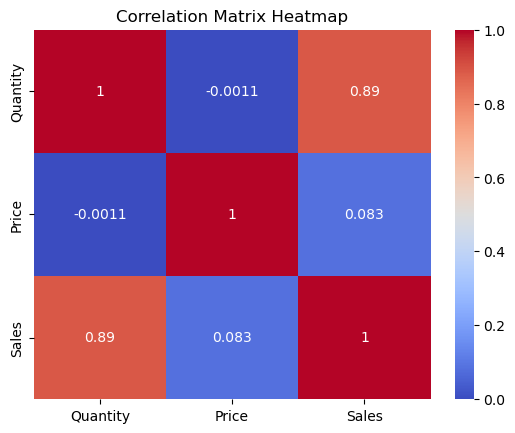

In [ ]:
# Visualize correlation uaing heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()


In [101]:
# Regression Analysis
# Simple Linear Regression Example
X = df.iloc[:,5:7].values
y = df['Sales'].values

# Add a constant for the intercept term
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                 5.022e+05
Date:                Tue, 03 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:56:31   Log-Likelihood:            -3.3621e+06
No. Observations:              254079   AIC:                         6.724e+06
Df Residuals:                  254076   BIC:                         6.724e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.571e+04    561.410    -81.429      0.0

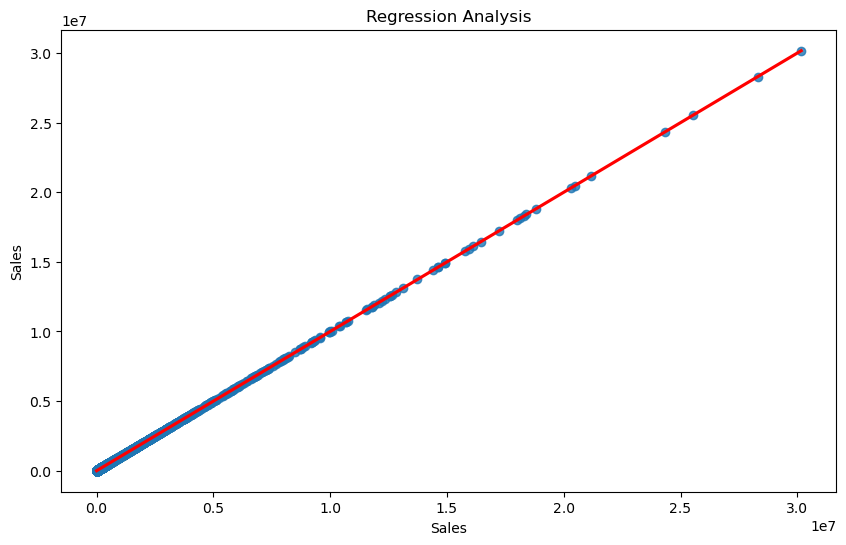

In [102]:

# Plot regression line
plt.figure(figsize=(10, 6))
sns.regplot(x= df.iloc[:,7], y= df['Sales'], data=df, line_kws={'color': 'red'})
plt.title("Regression Analysis")
plt.show()



In [103]:

# Save results as a text file
with open("hypothesis_testing_report.txt", "w") as file:
    file.write("Hypothesis Testing Report\n")
    file.write(f"T-Statistic: {t_stat}\nP-Value: {p_value}\n")
    file.write("Conclusion: " + ("Reject Null Hypothesis" if p_value < 0.05 else "Fail to Reject Null Hypothesis") + "\n")

with open("statistical_analysis_report.txt", "w") as file:
    file.write("Statistical Analysis Report\n")
    file.write("Correlation Matrix:\n")
    file.write(correlation_matrix.to_string())
    file.write("\n\nRegression Summary:\n")
    file.write(model.summary().as_text())

print("Reports Generated: 'hypothesis_testing_report.txt' and 'statistical_analysis_report.txt'")

Reports Generated: 'hypothesis_testing_report.txt' and 'statistical_analysis_report.txt'
